# 보스톤 집값 데이터셋을 이용한 다중선형회귀 모델 구축 및 평가

## 필요한 모듈


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


####  데이터 수집

In [2]:
#데이터셋을 로드
from sklearn.datasets import load_boston
boston = load_boston()

####  데이터 이해

In [17]:
#데이터셋 정보확인

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [18]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

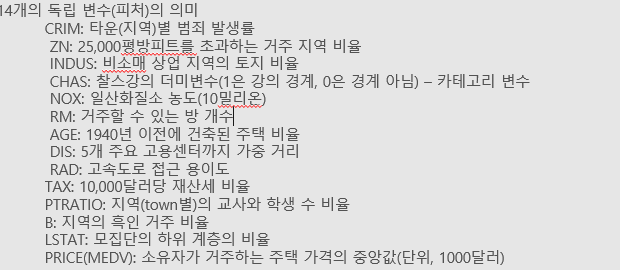

In [19]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [20]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환

SyntaxError: invalid syntax (<ipython-input-20-bdb78e825ca9>, line 2)

In [6]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# boston_df생성
# boston_df.head() 데이터 5개 확인

boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# 데이터셋 객체의 target배열(boston.target)을 종속 변수인 주택 가격("PRCIE") 컬럼으로 추가

In [7]:
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#데이터의 크기와 형태를 확인
boston_df.shape

(506, 14)

In [9]:
# 데이터프레임 정보
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### 데이터 이해:  데이터 선정 및 분포 정보 확인

In [10]:
# CHAS : 찰스강변 데이터 - 연속형 값이 아닌 카테고리형 , 분석 대상에 제외한다. (필요없는 데이터)
boston_df.drop(['CHAS'],axis=1,inplace=True)

In [11]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  PRICE    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
# 독립변수와  종속변수와의 관계에 대한 산점도 시각화

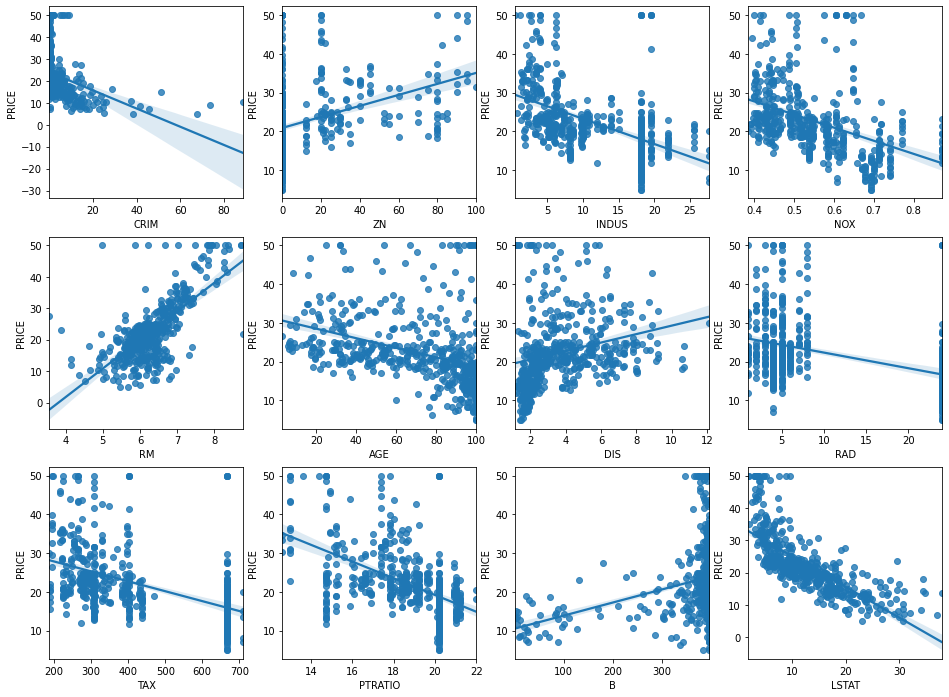

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# 이 둘은 항상 같이 임포트 

#3행4열의 subplots을 준비한다(캔버스 작업)
fig, axs = plt.subplots(figsize=(16,12),nrows=3,ncols=4)

x_features = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

for i, feature in enumerate(x_features):
    row = int(i/4) 
    col = i % 4
    sns.regplot(x=feature, y="PRICE", data=boston_df, ax = axs[row][col])
#현재 subplot의 행, 열 번호 갱신
#column이 4개 이므로
#산점도와 회귀선 시각화 

In [ ]:
##enumerate  : 인덱스번호와 features를 튜플 형태로 같이 가져오는 것 
##sns.regplot -> rplt.scatter 대신 뿌려주는 것 (회귀산점도)
##plt.subplots 여러개의 그림 나눠그림 
##fig=plt.figure() + ax=fig.subplots() = plt.subplots() --> figure객체를 생성하고 fig.subplots()를 호출하여 리턴 
#return값 axs[0][1]-> axs의 0행 1열 (몇행 몇열에 그림을 그려줘)

### 컬럼 별로 독립변수간의 상관관계 시각화(다중공선성이 의심되는 독립변수들)


In [ ]:
#데이터 탐색 : 데이터 선정 및 분포 정보 확인   -> 상관관계 시각화는 수업에서 안함 

In [ ]:
# 컬럼 별로 독립변수간의 상관관계 플롯 시각화


import matplotlib.pyplot as plt
import seaborn as sns

#전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정
ccol = ['INDUS','LSTAT','RM','PRICE']

#pairplot 시각화
sns.pairplot(boston_df[ccol])

#또는 매개변수로 칼럼들을 직접 선택해서 시각화할 수 있다. 
#sns.pairplot(boston_df, vars=ccol)

In [ ]:
#선택한 변수들 간 상관 계수 확인
corrs = boston_df[ccol].corr()
corrs

In [ ]:
#히트맵
import matplotlib.pyplot as plt
import seaborn as sns

#전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정
ccol = ['INDUS','LSTAT','RM','PRICE']

#선택한 변수들 간 상관 계수 확인
corrs = boston_df[ccol].corr()

#상관계수 값에 대한 히트맵
#매개변수 annot :맵에 값 표시 여부 지정
#매개변수 annot_kws : 표시되는 값에 대한 추가 옵션

sms.heatmap(corrs, annot=True, annot_kws={'size':13})

# 보스턴 집값 다중선형회귀 분석(사이킷런)

In [ ]:
# 데이터 준비, 탐색은 위에서 수행한 것으로 대체

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# X(독립변수), Y(종속변수) 분할
X = boston_df.drop(['PRICE'],axis=1)
y = boston_df['PRICE']
##inplace안 줬기 때문에 price를 가져올 수 있음 

### 데이터 준비

#### 데이터 분할

In [24]:
#학습용 데이터와 평가용 데이터로 분할하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
#X_train 데이터 일부 확인
X_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13


In [26]:
y_train.head()

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
Name: PRICE, dtype: float64

### 모델 클래스 선택

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [ ]:
##모델 객체(reg) 안에 학습을 통한 12개의 회귀계수가 들어가 있음 

### 모델 구축 

In [28]:
#학습 수행

reg.fit(X_train,y_train)

LinearRegression()

### 모델 평가

In [30]:
from sklearn.metrics import mean_squared_error , r2_score

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = reg.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("MSE:{0:.3f},RMSE:{1:.3f}".format(mse,rmse))
print("R2:{:.3f}".format(r2))

MSE:21.697,RMSE:4.658
R2:0.709


In [ ]:
##실제값(y_test)- 예측값(y_pred)
##r2_score
#{0:} -> 0번 : mse /{1:}->1번 rmse


In [33]:
# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기
n = len(X_train)

#독립변수의 갯수
k = len(X_train.columns)

# 수정된 결정 계수
adj_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))

print("Adjusted R2:{:.4f}".format(adj_r2))

Adjusted R2:0.6986


In [22]:
## feature의 개수 - k

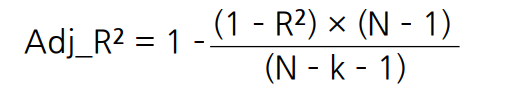

#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [38]:
#회귀 계수 확인 : 각각의 독립변수의 설명력 확인

#ndarray 의 실수를 부동 소수점으로 출력 
np.set_printoptions(suppress=True)

#회귀 계수와 절편 값 확인 

print("Y 절편: {:.3f}".format(reg.intercept_))
print("회귀 계수:",np.round(reg.coef_,3))

#ndarray의 실수 출력 옵션 복구 
np.set_printoptions(suppress=False)

Y 절편: 31.428
회귀 계수: [ -0.142   0.038   0.073 -14.901   4.146  -0.009  -1.418   0.277  -0.01
  -0.937   0.013  -0.566]


In [ ]:
##np.set 이 부분은 안해도 됨 (하면 복구해줘야함)
##회귀계수 확인해보기 

In [46]:
coef = pd.Series(data = np.round(reg.coef_, 3), index=X.columns)
coef

CRIM       -0.142
ZN          0.038
INDUS       0.073
NOX       -14.901
RM          4.146
AGE        -0.009
DIS        -1.418
RAD         0.277
TAX        -0.010
PTRATIO    -0.937
B           0.013
LSTAT      -0.566
dtype: float64

In [47]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦
coef = pd.Series(data = np.round(reg.coef_, 3), index=X.columns)

print('y= ' + str(reg.intercept_) + '+ ')

for i, c in zip(coef.index, coef.values): print('(' + str(c) + ')*' + str(i))

y= 31.428479482301164+ 
(-0.142)*CRIM
(0.038)*ZN
(0.073)*INDUS
(-14.901)*NOX
(4.146)*RM
(-0.009)*AGE
(-1.418)*DIS
(0.277)*RAD
(-0.01)*TAX
(-0.937)*PTRATIO
(0.013)*B
(-0.566)*LSTAT


In [ ]:
##y = w0 +w1*CRM(feature name(index로 받은 것))
##음수를 표현해주기 위해 +str(c)+ / str(c):coef
##zip 시리즈를 라벨인덱스와 벨류을 묶어서 쌍으로 가져오는 것

###  실제값과 예측값의 분포차이를 시각화

Text(0, 0.5, 'Predicted price')

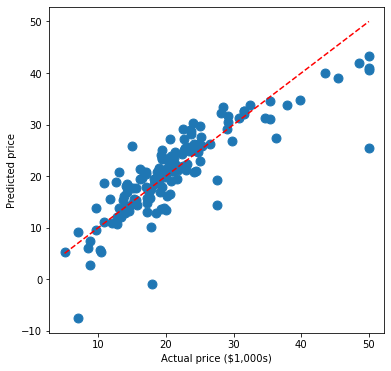

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=80)
plt.plot([5,50],[5,50], c='r',ls='--')
plt.xlabel("Actual price ($1,000s)")
plt.ylabel("Predicted price")

In [ ]:
##x축 실제값 y축 예측값
## 두 값이 일치하면 예측이 잘된 것 

##plt.plot 가이드라인 (얼만큼 일치하는지 보려고)
#grid 바둑판선 그려주기 

##빨간선 가까이에 있는 값들은 예측을 잘한 것

# 보스턴 집값: 다중선형회귀 분석(스탯츠모델)

In [51]:
# 최소 제곱법으로 객체 생성, 학습, 예측, 평가를 진행한다.

import statsmodels.api as sm
# 훈련 데이터로 학습 수행
X_train = sm.add_constant(X_train)
reg = sm.OLS(y_train,X_train).fit()

# 검증 데이터로 예측 수행
X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

#평가 지표 값 확인
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     79.49
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           4.52e-91
Time:                        14:33:18   Log-Likelihood:                -1058.4
No. Observations:                 354   AIC:                             2143.
Df Residuals:                     341   BIC:                             2193.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4285      6.126      5.130      0.0

In [ ]:
##상수항을 더해주는 것 - add_constant -> 새롭게 x train 만듬
#객체를 넣어주면서 만든다 ( y train을 먼저 넣는다)/ 객체만들기, 학습하기를 한줄에 쓴 것
#reg에 회귀계수 완성이 됨 

#summary하려고 스탯츠 모델 
#dep.variable : 종속변수

# [응용1]: 다중 선형회귀 연습- load_diabetes

### 필요한 모듈 import

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 데이터 수집

In [52]:
from sklearn.datasets import load_diabetes

diab = load_diabetes()

In [ ]:
### 데이터 이해

In [9]:
dir(diab)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [10]:
print(diab.DESCR)
##정보 

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [11]:
diab.data[:5]
#data 앞에서 5개만 봄 

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [12]:
diab.target[:5]
##1년뒤 당뇨병 진행률 

array([151.,  75., 141., 206., 135.])

In [13]:
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### 데이터 준비

In [54]:
# X(독립변수), Y(종속변수) 분할
from sklearn.model_selection import train_test_split

X=diab.data
y=diab.target
# 학습용 데이터와 평가용 데이터로 분할하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [27]:
### 모델 구축
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.linear_model import LinearRegression


# 회귀 모델 객체 생성
reg = LinearRegression()
#학습 수행
reg.fit(X_train , y_train)
#회귀 계수 확인, 회귀식 확인 
coef = pd.Series(data = reg.coef_, index = diab.feature_names)
print("y절편 :",reg.intercept_)
print("회귀계수: ", coef)
# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = reg.predict(X_test)

### 모델 평가
# 평가 지표 계산
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("MSE:{0:.3f},RMSE:{1:.3f}".format(mse,rmse))
print("R2:{:.3f}".format(r2))

n =len(X_train)
k = len(diab.feature_names)
adj_r2 = 1-((1-r2)*(n-1)/(n-k-1))
print("Adj_r2:{:.3f}".format(adj_r2))

y절편 : 152.62754194200332
회귀계수:  age    -31.805370
sex   -214.671676
bmi    445.137506
bp     376.354944
s1    -802.451729
s2     525.951855
s3     106.399671
s4     172.311225
s5     799.479042
s6      57.167687
dtype: float64
MSE:2919.751,RMSE:54.035
R2:0.501
Adj_r2:0.485


# [응용2] 캘리포니아 주택 가격

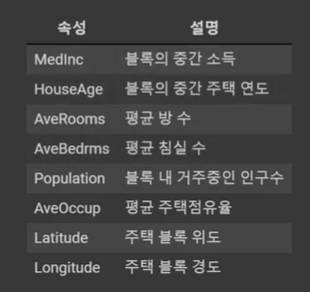

### 데이터 수집 및 탐색

In [ ]:
#fetch data이므로 온라인으로만 fetch가능
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

In [ ]:
# 샘플:20640

In [ ]:
#속성 :8개

# 시각화로 탐색

In [ ]:
# 온라인 아닌경우 :  pd.read_csv('./data/california_dataset.csv')
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Price'] = california.target
california_df.head()

california_df.describe()

In [ ]:
# 종속(price)변수 VS 독립변수(8개)  관계 시각화 탐색


In [ ]:
# 독립변수 간 상관관계 확인

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다


#pairplot 시각화



In [ ]:
# 위경도 데이터 시각화
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12, 10));

california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, s=california_df['Population']/100, \
                   figsize=(12, 10), label='Population', c=california_df['Price'], cmap=plt.get_cmap('viridis'),\
                  colorbar=True);

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#상관 계수 값에 대한 히트맵


In [ ]:
# 선형회귀

# 회귀식으로 표현

# 결과 시각화 ( actual price VS predicted price)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기


# 평가 지표 계산

print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, rmse))
print("R2: {:3f}".format(r2))

In [ ]:
# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기


#독립변수의 갯수


# 수정된 결정 계수

print("Adjusted R2: {:.4f} ".format(adj_r2))